# Getting Started
This notebook shows you how to run Principal Component Analysis (PCA) using Python and Numpy, and graph your results using Matplotlib.  Each box shows you a code example of how to do a step.  To run a step, click on that code box and then click the Play button above (just left of the STOP button).

## Step 1: Initial Setup
We first need to get ready to use Numpy, Matplotlib, and define a few convenience functions to make PCA easier. Click on the following code box, and click the Play button above; you should then see a simple graph:

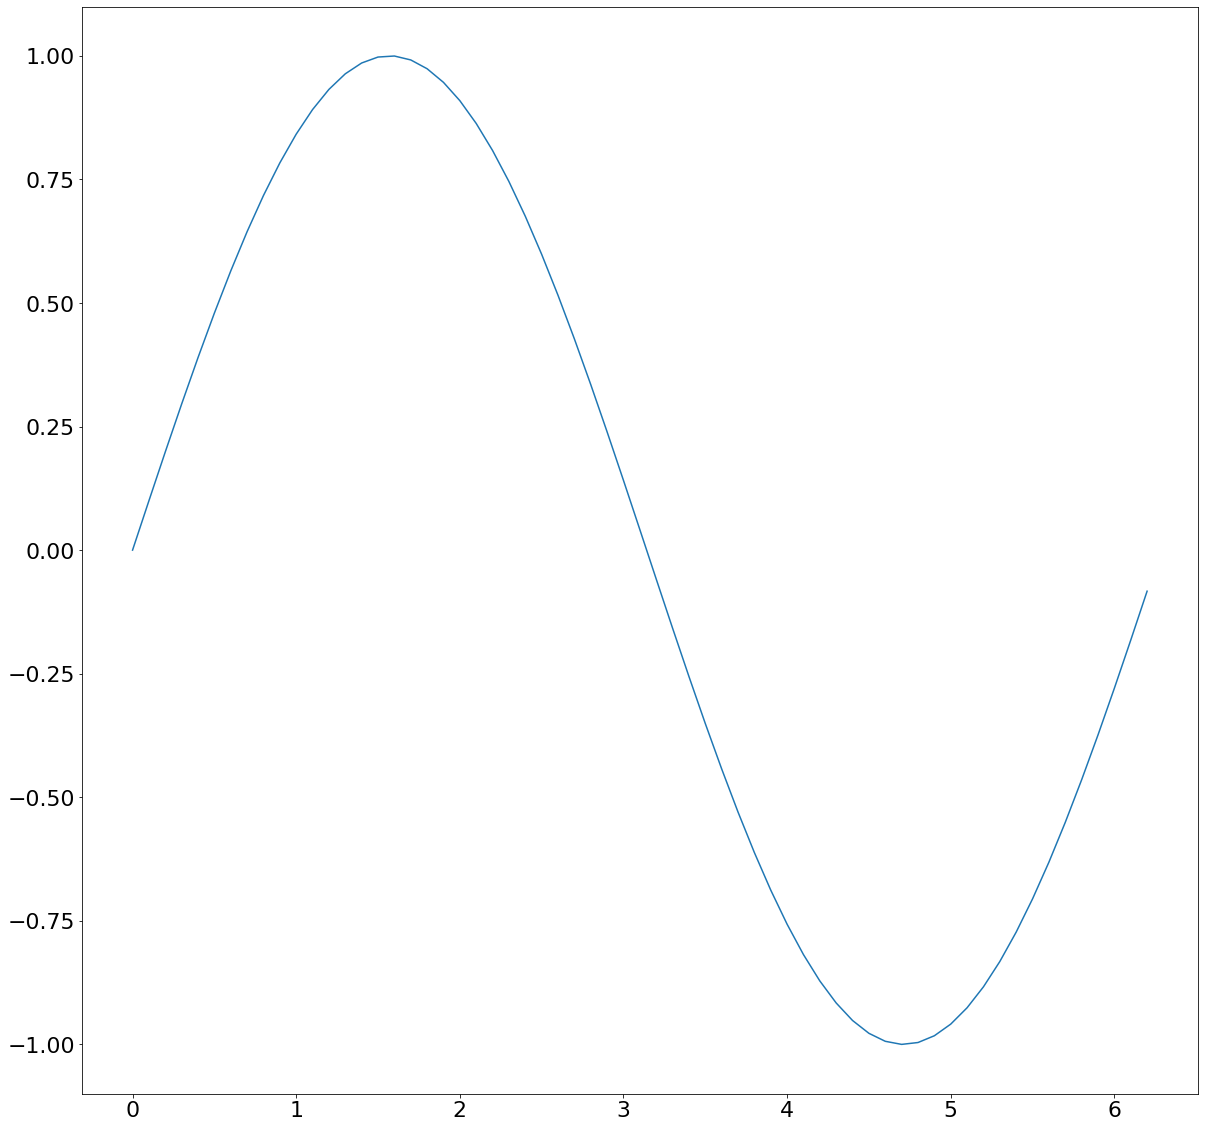

In [3]:
# import the libraries we need
import numpy
from matplotlib import pyplot
from math import cos, sin, pi
# make this notebook display graphs automatically
%matplotlib inline
# display large graph area
pyplot.rcParams["figure.figsize"] = 20, 20
pyplot.rcParams.update({'font.size': 22}) # increase font size to be readable!

# define convenience functions
def get_rotation_matrix(theta=0.5, isDegrees=True):
    if isDegrees:
        theta *= pi / 180.
    r = numpy.matrix(((cos(theta), -sin(theta)), (sin(theta), cos(theta))))
    return r

def sort_pca(pca_vars, pca_axes):
    'sort our principal components for biggest to smallest variance'
    s = list(zip(pca_vars, pca_axes.T))
    s.sort(reverse=True)
    eig_vals2 = numpy.array([t[0] for t in s])
    eig_vecs2 = numpy.matrix([t[1] for t in s]).T
    return eig_vals2, eig_vecs2 # array of variances, matrix of PCA vectors

def recenter(vecs, normalize=True):
    'center the data on the origin, so the optimal prediction for any coord is just 0'
    m = numpy.matrix(vecs).mean(axis=1)
    centered = numpy.array(vecs - m)
    if normalize: # rescale all dimensions to a variance of 1
        rescale = get_rescale_matrix(numpy.sqrt(centered.var(axis=1)))
        return rescale.I * centered, numpy.array(m), rescale # normalized data, center, scale-matrix
    return centered, numpy.array(m) # unnormalized data, center

def get_rescale_matrix(scales):
    'make a diagonal matrix with the specified scale factors'
    m = numpy.matrix(numpy.zeros((len(scales), len(scales))))
    for i,s in enumerate(scales):
        m[i,i] = s
    return m

# display a graph of SIN(X)
rads = numpy.arange(0, 2*pi, 0.1)
pyplot.plot(rads, numpy.sin(rads))

## Step 2: Human Height vs. Weight Dataset
The following code box shows how to enter a simple dataset of (height, weight) pairs, convert it from row-format to column-format (i.e. each datapoint is represented by one column in the data array), which is convenient for numpy calculations and graphing.  Click on the code box and click the Play button above, to graph these data:

(60, 80)

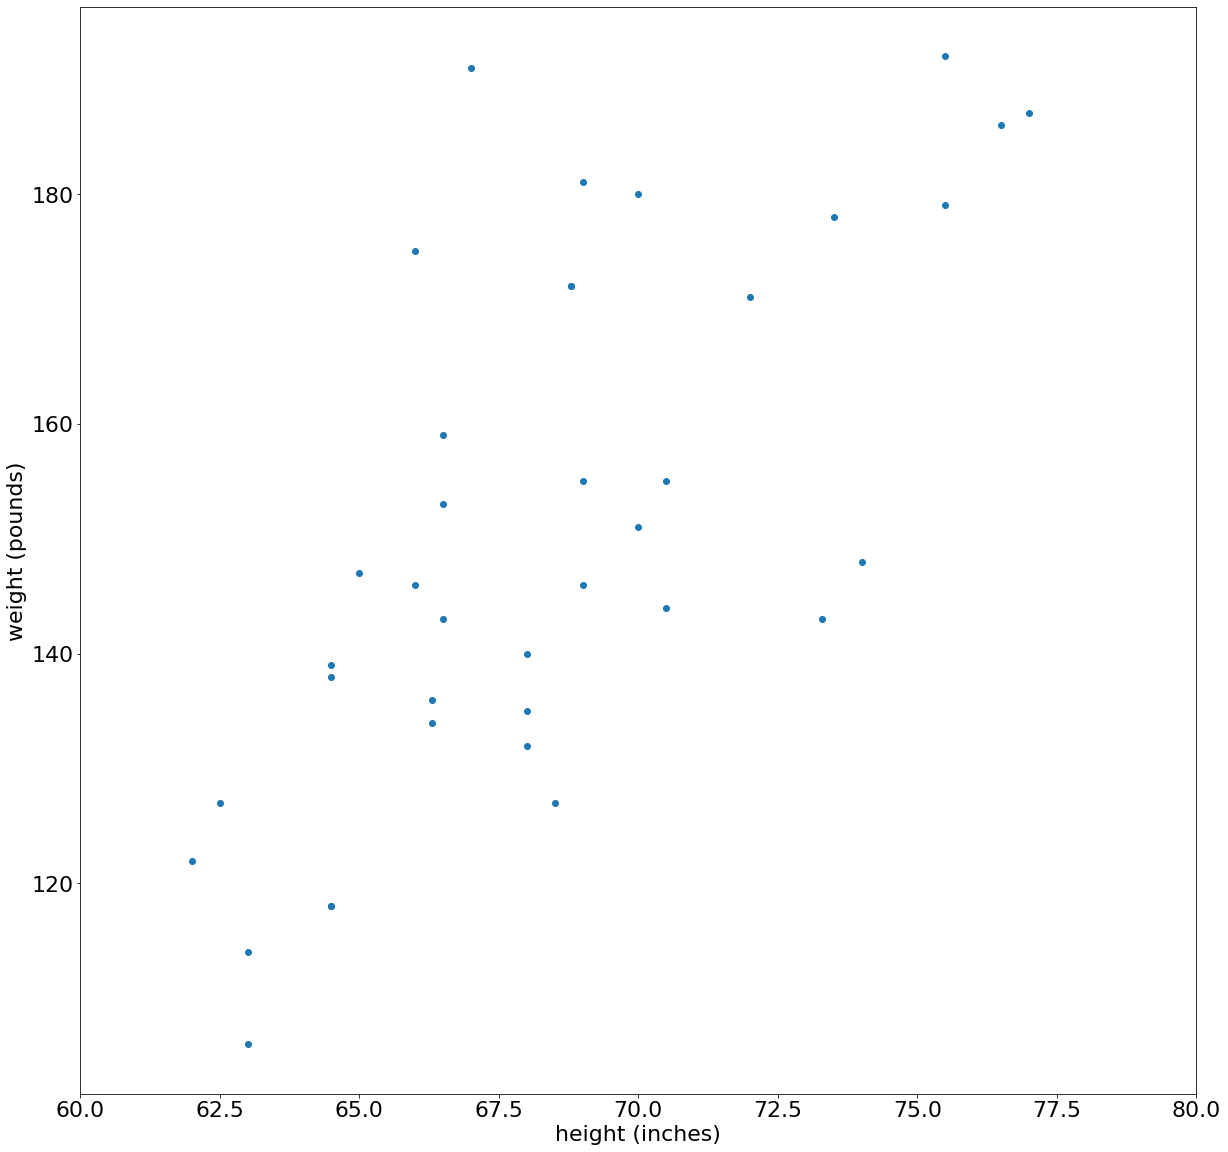

In [4]:
rows = [[64.5, 118.0], [73.3, 143.0], [68.8, 172.0], [65.0, 147.0], [69.0, 146.0], [64.5, 138.0], [66.0, 175.0], [66.3, 134.0], [68.8, 172.0], [64.5, 118.0], [70.0, 151.0], [69.0, 155.0], [70.5, 155.0], [66.0, 146.0], [68.0, 135.0], [68.5, 127.0], [73.5, 178.0], [66.3, 136.0], [70.0, 180.0], [76.5, 186.0], [62.0, 122.0], [68.0, 132.0], [63.0, 114.0], [72.0, 171.0], [68.0, 140.0], [77.0, 187.0], [63.0, 106.0], [66.5, 159.0], [62.5, 127.0], [67.0, 191.0], [75.5, 192.0], [69.0, 181.0], [66.5, 143.0], [66.5, 153.0], [70.5, 144.0], [64.5, 139.0], [74.0, 148.0], [75.5, 179.0]]
hw = numpy.array(rows).T # transpose to column format
hwc, m = recenter(hw, normalize=False) # recentered on (0,0)
pyplot.plot(hw[0], hw[1], marker='o', linestyle='')
pyplot.xlabel('height (inches)')
pyplot.ylabel('weight (pounds)')
pyplot.xlim(xmin=60, xmax=80)

## Step 3: What is a Rotation Matrix?
A rotation matrix represents a rotated coordinate system as a table whose columns are the coordinates of its axes.  The following code example shows how to get a 2D rotation matrix for a 30 degree (counter-clockwise) rotation, print it, and graph its axes (column vectors):

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


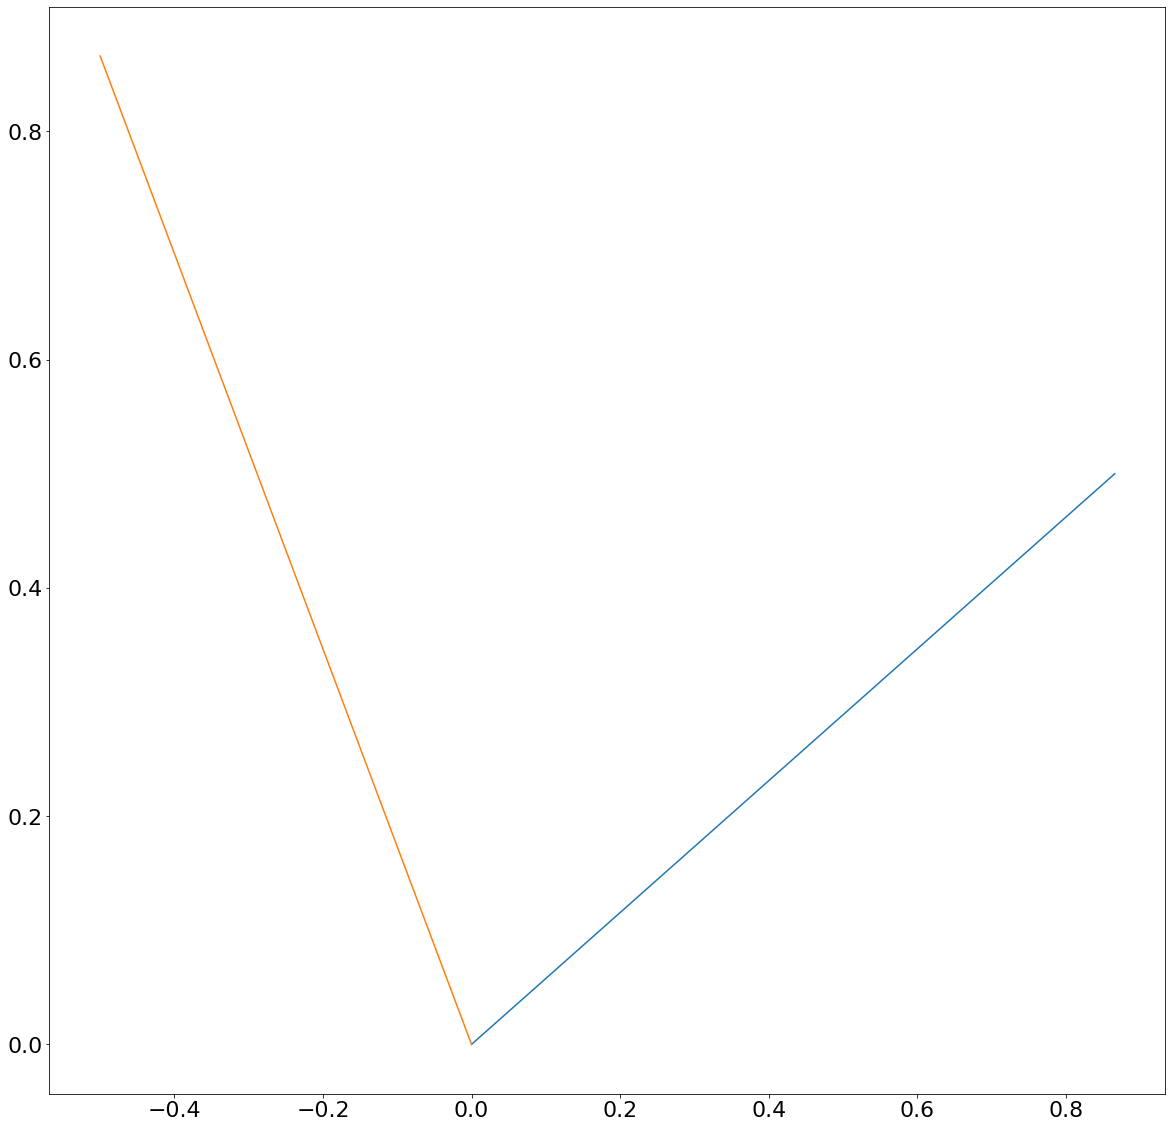

In [5]:
r = get_rotation_matrix(30)
print(r)
pyplot.plot((0,r[0,0]), (0,r[1,0]))
pyplot.plot((0,r[0,1]), (0,r[1,1]))

## Step 4: Rotating a Dataset
Multiplying a dataset by a rotation matrix has the effect of rotating it by that amount (around the origin (0,0)).  Here we rotate the dataset (centered at (0,0)) by our rotation matrix and graph the result:

(-50, 70)

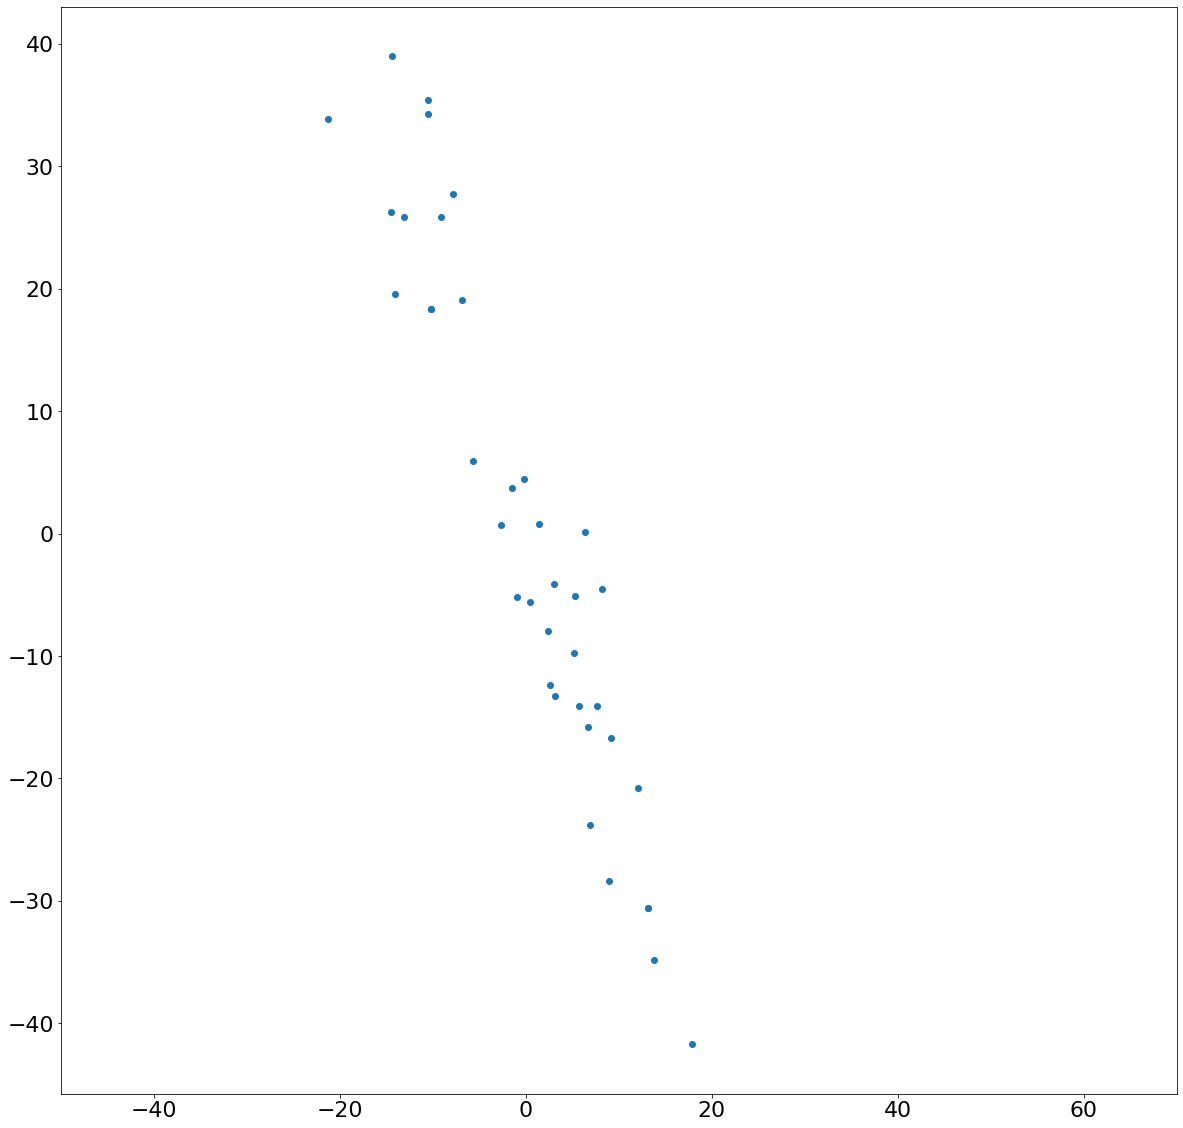

In [6]:
hwr = numpy.array(r * hwc)
pyplot.plot(hwr[0], hwr[1], marker='o', linestyle='')
pyplot.xlim(xmin=-50, xmax=70)

## Step 5: What is a Covariance Matrix?
A covariance matrix is a square table whose entries (i,j) show the covariance of coordinate i vs. coordinate j, and whose diagonal entries (i,i) show the variance of coordinate i.  A positive covariance implies a positive correlation between coordinates i and j.  It can be computed on a dataset using the numpy.cov() function:

In [7]:
print(numpy.cov(hw))

[[ 15.95035562  65.60156472]
 [ 65.60156472 551.24039829]]


**QUESTION**: what is the variance for *h*? For *w*?  What is the covariance *Cov(h,w)*?

**ANSWER**: The variance for h is 15.95035562, the variance for w is 551.24039829, and Cov(h,w) is 65.60156472.

## Step 6: Find Rotated Axes with Zero Covariance
For this simple two-dimensional dataset, it's easy to search all possible rotations (around the center of the data) for its "natural" coordinate system where the covariance goes to zero.  For each possible rotation, we calculate the rotated data's covariance matrix C, whose element C[0,0] is the variance of X', C[1,1] is the variance of Y', and C[0,1] is the covariance of X', Y':

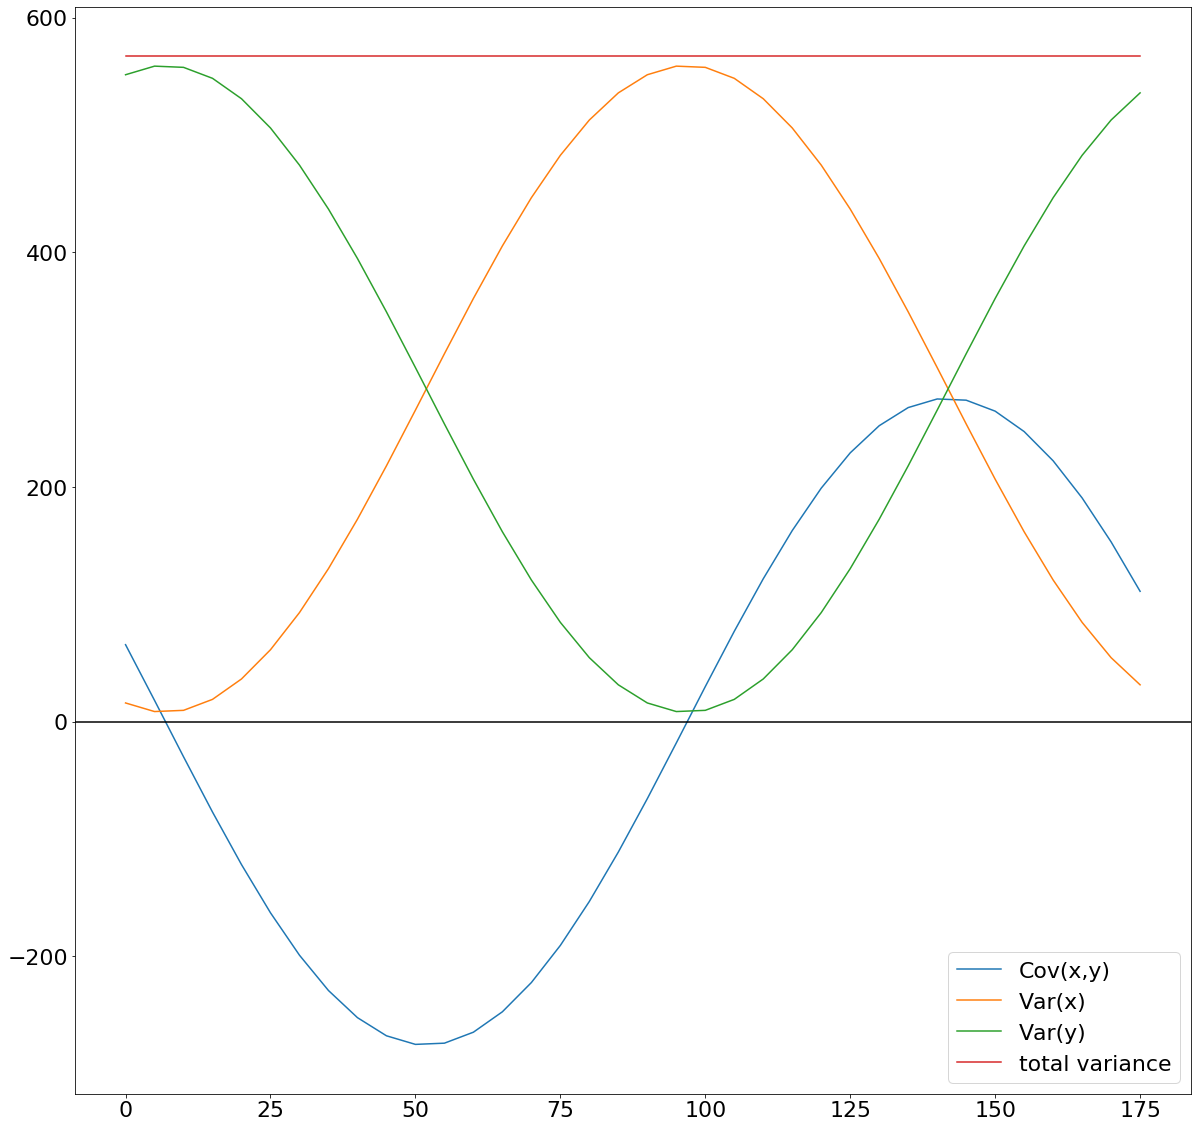

In [8]:
rots = numpy.arange(0, 180, 5) # from 0 to 180 degrees in 5 degree steps
cs = [numpy.cov(get_rotation_matrix(r) * hwc) for r in rots]
pyplot.plot(rots, [c[0,1] for c in cs], label='Cov(x,y)')
pyplot.plot(rots, [c[0,0] for c in cs], label='Var(x)')
pyplot.plot(rots, [c[1,1] for c in cs], label='Var(y)')
pyplot.plot(rots, [c[0,0] + c[1,1] for c in cs], label='total variance')
pyplot.axhline(0, color='k')
pyplot.legend(loc='lower right')

## Step 7: General PCA Method for Finding the Principal Component Axes
We can find the principal component axes for any dataset, no matter how many dimensions, in a single step, by simply computing the so-called eigenvectors of the covariance matrix.  Numpy makes this easy.  The following example displays the PCA axes superimposed on the dataset; intuitively, you can see they provide the "natural coordinate system" that best fits the dataset:

(10, 130)

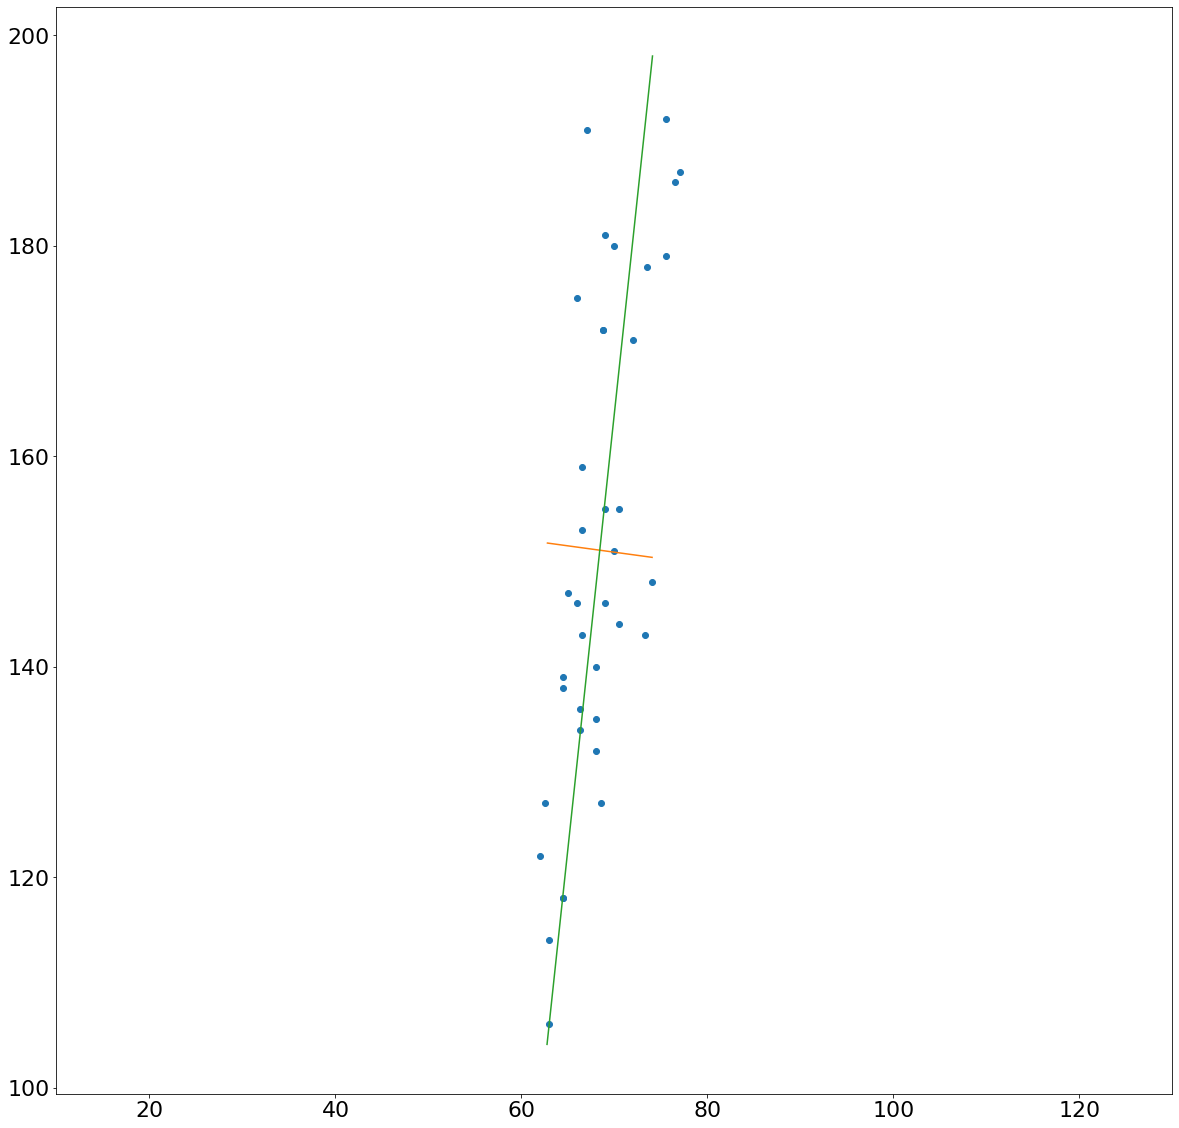

In [9]:
c = numpy.cov(hwc)
pca_variances, pca_axes = numpy.linalg.eig(c) # compute eigenvectors
a = numpy.array(pca_axes) * 2 * numpy.sqrt(pca_variances) # scale to 2 std. dev.
pyplot.plot(hw[0], hw[1], marker='o', linestyle='')
pyplot.plot([m[0]-a[0,0],m[0]+a[0,0]],[m[1]-a[1,0],m[1]+a[1,0]])
pyplot.plot([m[0]-a[0,1],m[0]+a[0,1]],[m[1]-a[1,1],m[1]+a[1,1]])
pyplot.xlim(xmin=10, xmax=130)

## Step 8: Reversing the PCA Rotation
Our pca_axes matrix transforms points in PCA coordinates to "real-world" coordinates (in this case, height and weight).  For the opposite conversion from real-world coordinates to PCA coordinates, we need the reverse rotation, which is called the inverse of the rotation matrix $R^{-1}$.  The following code example shows how to convert our height-weight dataset to PCA coordinates, graph them, and assess whether PCA actually eliminated all covariance (note that it is printed in scientific notation where "e-14" means "times 10 to the -14th power"):

[[ 8.02792108e+00 -2.44688381e-14]
 [-2.44688381e-14  5.59162833e+02]]


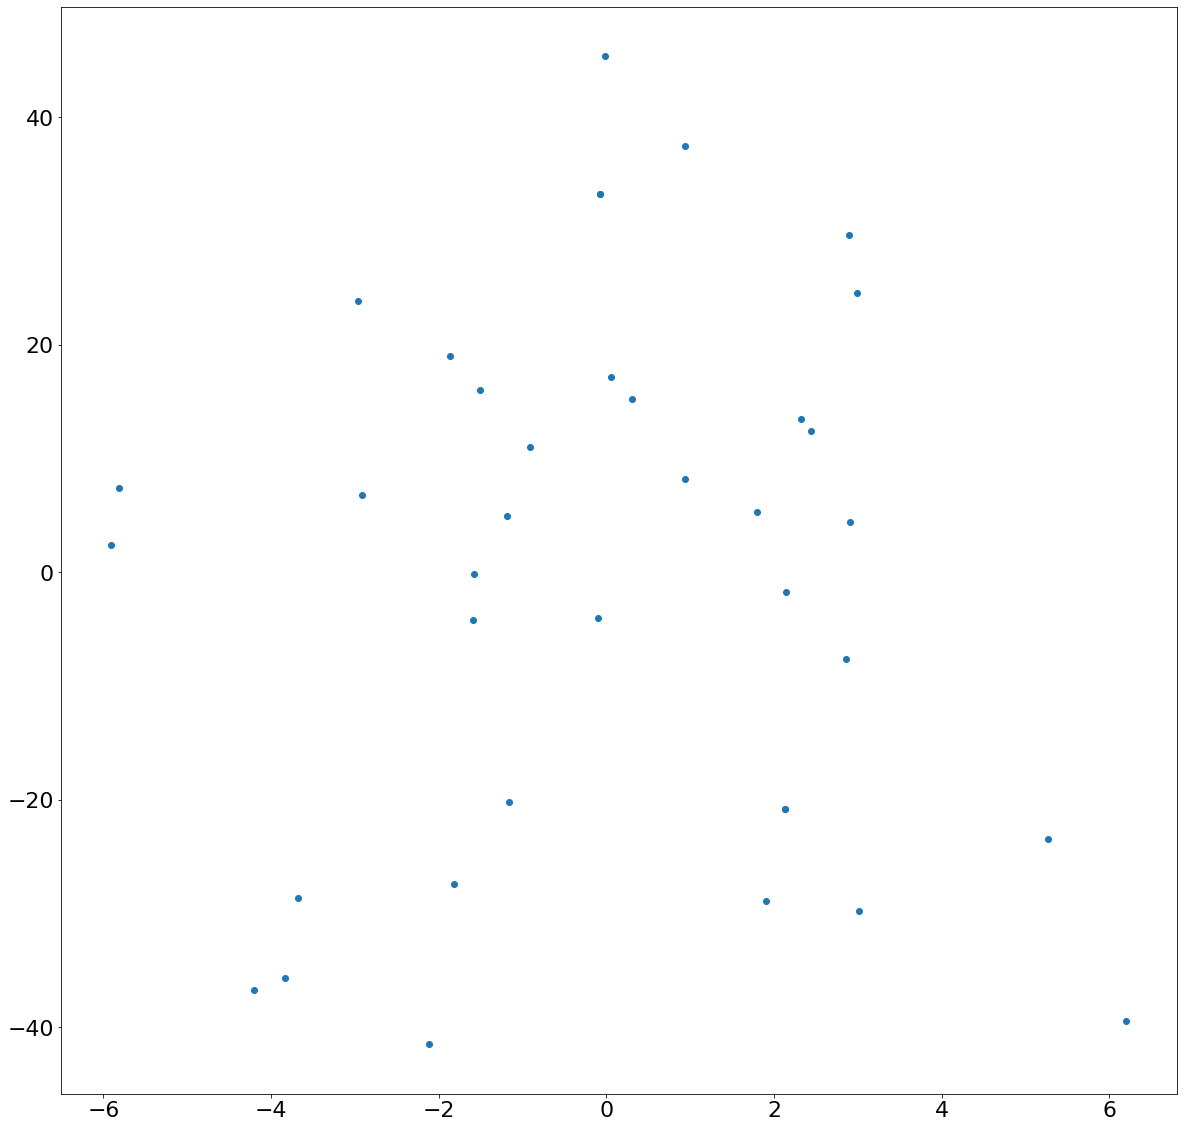

In [10]:
rinv = numpy.matrix(pca_axes).I # get the inverse rotation matrix
hwr = numpy.array(rinv * hwc) # transform to PCA coordinates
pyplot.plot(hwr[0], hwr[1], marker='o', linestyle='')
print(numpy.cov(hwr))

## Step 9: Sorting the PCA axes by Importance
As you can see in the example above, some PCA axes capture more of the inherent variance in the data than others.  We therefore sort the PCA axes from biggest to least variance, as follows:

In [11]:
print(pca_variances)
print(pca_axes)
pca_variances, pca_axes = sort_pca(pca_variances, pca_axes)
print('Reordered by variance:')
print(pca_variances)
print(pca_axes)

[  8.02792108 559.16283284]
[[-0.9927866  -0.11989481]
 [ 0.11989481 -0.9927866 ]]
Reordered by variance:
[559.16283284   8.02792108]
[[-0.11989481 -0.9927866 ]
 [-0.9927866   0.11989481]]


# Project Questions

## Step 10: How Well Can We Model Height vs. Weight Using Just One Variable?
The value of sorting the PCA axes this way is that it provides a natural ordering for "compressing" the data as accurately as possible.  The following code example shows how accurately we can model the height vs. weight dataset using ONLY the first principal component (by just setting the second component to its mean value, zero), and then predicting both the height and weight from that value:

[[ 33.28432361   7.40958429 -20.84170052   4.43356477   4.94677215
   13.42859159 -23.48435487  17.18392734 -20.84170052  33.28432361
   -0.13705566  -3.98830726  -4.16814947   5.30645657  15.98731957
   23.86966498 -27.36192571  15.19835414 -28.9278671  -35.66390294
   29.61291422  18.96567937  37.43531222 -20.2325773   11.02338656
  -36.71663695  45.37760503  -7.65971665  24.58903381 -39.48883529
  -41.50072774 -29.80075889   8.22486897  -1.70299704   6.75250314
   12.43580498   2.36172492 -28.59450193]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]]


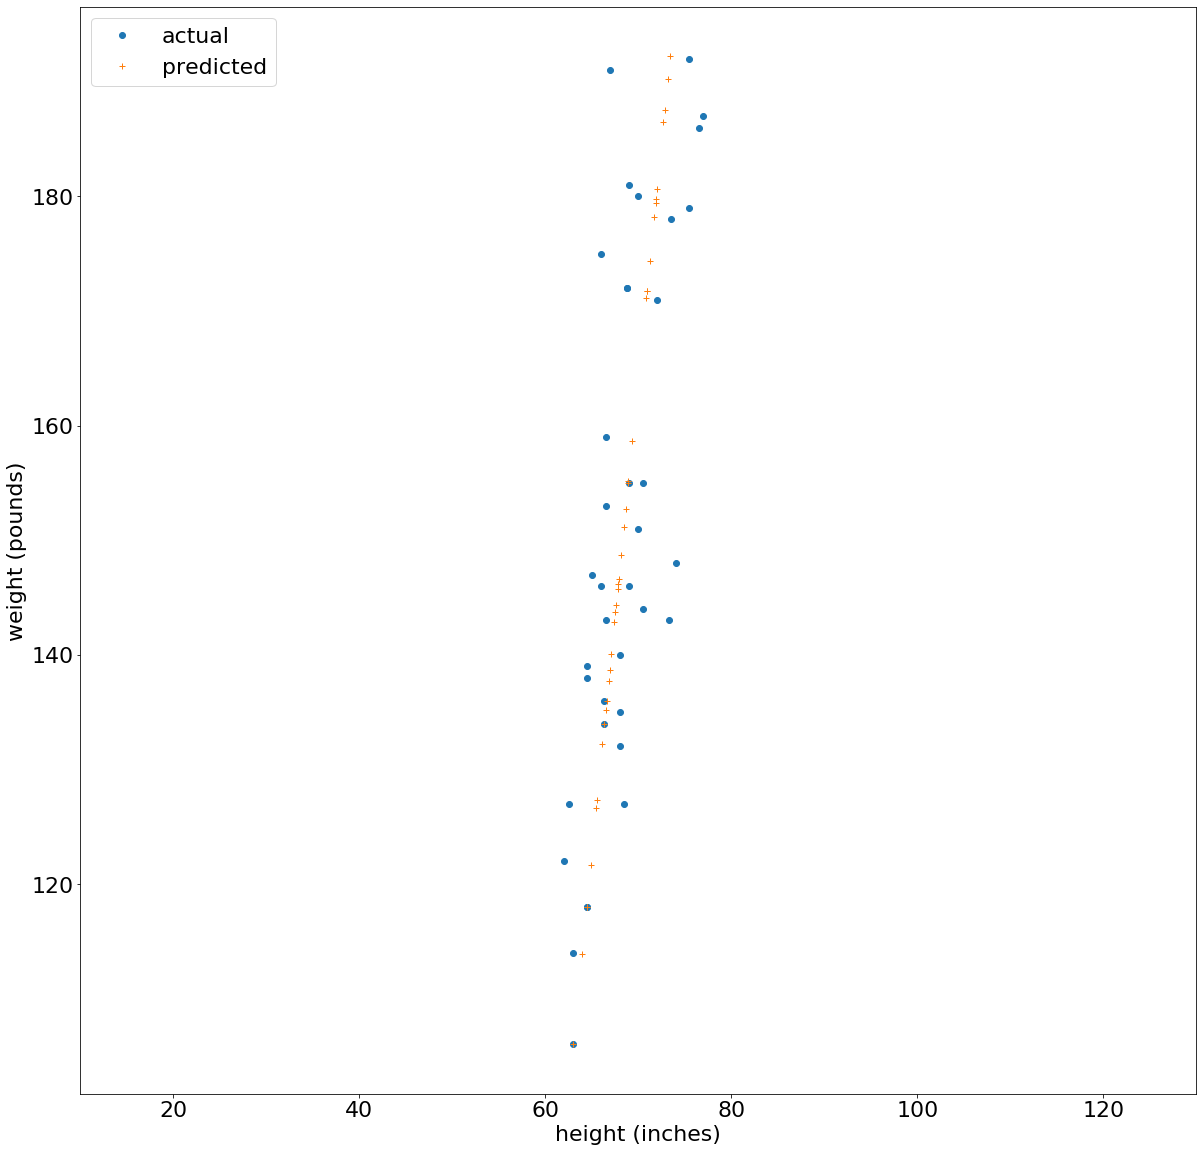

In [13]:
rinv = pca_axes.I # get the inverse rotation matrix
hwr = numpy.array(rinv * hwc) # transform to PCA coordinates
hwr[1] = 0 # set second PCA coordinate to zero
print(hwr)
hw2 = numpy.array(pca_axes * hwr + m) # predict height, weight
pyplot.plot(hw[0], hw[1], marker='o', linestyle='', label='actual')
pyplot.plot(hw2[0], hw2[1], marker='+', linestyle='', label='predicted')
pyplot.xlabel('height (inches)')
pyplot.ylabel('weight (pounds)')
pyplot.xlim(xmin=10, xmax=130)
pyplot.legend(loc='upper left')

### Questions

* Why do the predictions lie on a straight line?

**ANSWER**: These predictions lie on a straight line because we're only taking one variable into account as an input for making the prediction. Fundamentally, that gives us only one dimension of variation to use as a basis for making predictions. Even though we are predicting two variables, our predictions in that two dimensional space are constrained to just a one dimensional line.

* What do you expect to be the average error of these predictions?

**ANSWER**: $\sigma = \sqrt{\sum_{i=m+1}^{n}Var(x'_{i})}$, where $m = 1$ and $n = 2$, and $x'_{i}$ is the $i^{th}$ PC. So, $\sigma = \sqrt{Var(x'_{2})} =  \sqrt{8.02792108} = 2.83335862185$.

* How much better are these predictions than the "naive prediction" $(\overline h, \overline w)$?

**ANSWER**: The PCA prediction would be much better than the naive prediction. This is because PCA minimizes the error by prioritizing the largest variances. PCA had error of $2.83$ (from the previous question), while the naïve prediction has error just calculated from the root of the summmed variances of the two variables, giving $\sigma = \sqrt{Var(X_{1}) + Var(X_{2})} = \sqrt{567.18} = 23.81$.

* What would happen if you changed the third line of code above to be "hwr[0]=0" (i.e. setting the First principal component to zero)?  Test your prediction by modifying the code and rerunning it.

**ANSWER**: If we changed the third line of code to be "hwr[0] = 0", then the predictions would lie on the line adjacent to when "hwr[1] = 0". In other words, the predictions would lie on the one dimension that we input.

* based on this, for our goal of compressing the data to a single dimension, why did we choose to retain the *first* principal component (the one with the *largest* variance in `sort_pca()`) and throw away the second principal component, rather than the other way around?

**ANSWER**: We chose to retain the first principal component and throw away the second principal component rather than the other way around because by picking the component with the largest variance, it minimizes the error/the amount of variance remaining in the rest of the PCs.

* What would happen if you deleted the third line of code (i.e. leave both principal components unchanged)?  Test your prediction by modifying the code and rerunning it.

**ANSWER**: It looks like the predicted values would lie on top of the actual (they are pretty much equal).